# CM2604 Machine Learning Coursework
### S.C. Thennakoon | IIT - 20232005 | RGU - 2330960

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import tensorflow as tf

In [50]:
import joblib
import keras_tuner as kt

## Data Preprocessing

### Data Collection and Cleaning

On initial glance the csv files are seperated with `;` instead of `,`. And there happens to be seperated `bank` and `bank-addtional` files 

In [5]:
bank = pd.read_csv("bank+marketing/bank/bank.csv", sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank_full = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=';')
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
bank_additional = pd.read_csv("bank+marketing/bank-additional/bank-additional.csv", sep=';')
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
bank_additional_full = pd.read_csv("bank+marketing/bank-additional/bank-additional-full.csv", sep=';')
bank_additional_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
bank.isna().sum(), bank_full.isna().sum(), bank_additional.isna().sum(), bank_additional_full.isna().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y    

There are no na or null values present in the 4 dataframes

In [10]:
common_rows_bank = bank_full.merge(bank)
common_rows_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
1,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
2,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
3,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes
4517,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
4518,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
4519,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes


In [11]:
common_rows_bank_additional = bank_additional_full.merge(bank_additional)
common_rows_bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,55,technician,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
4116,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
4117,32,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
4118,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


Every row in both of `bank` and `bank-additional` are present in `bank-full` and `bank-additional-full`, the representations are 10% of the original datasets. Therefore we can safely ignore the smaller dataset and proceed with the larger `bank-full` and `bank-additional-full`.

In [12]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

There are additioanl 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' in the `bank-additional` dataset

In [13]:
common_columns = bank_additional_full.columns.intersection(bank_full.columns)
common_columns_dataframe = bank_additional_full[common_columns]
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


In [14]:
common_rows_bank_all = common_columns_dataframe.merge(bank_full)
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


Every row in the in `bank-full` is in `bank-additional-full`, Therefore Project will the done with the use of `bank-additional-full` dataset because of more data.

In [15]:
bank_additional_full.drop_duplicates(inplace=True)
bank_additional_full.shape

(41176, 21)

In [16]:
bank_additional_full['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

### Data Visualization and Exploratory Data Analysis

In [17]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [18]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank_additional_full['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [20]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
#sns.pairplot(bank_additional_full, hue='y')

Data is appeared to be heavily clustered and some outliers can be seen

<Axes: ylabel='duration'>

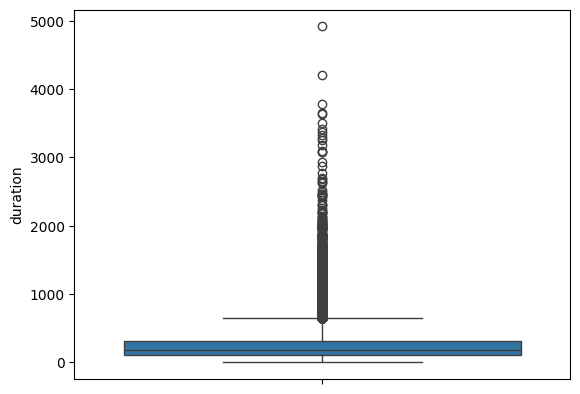

In [22]:
sns.boxplot(bank_additional_full['duration'])

There appears to be some outliers present in the `duration` column (visualized in the box plot above), by using a 0.05 - 0.95 confidence interval we can eleminate the outliers

In [23]:
def remove_outliers_iqr(data:pd.DataFrame, columns):
    data_copy = data.copy()
    for column in columns:
        Q1 = data_copy[column].quantile(0.05)
        Q3 = data_copy[column].quantile(0.95)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_copy.drop(data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)].index, inplace=True)

    return data_copy

<Axes: ylabel='duration'>

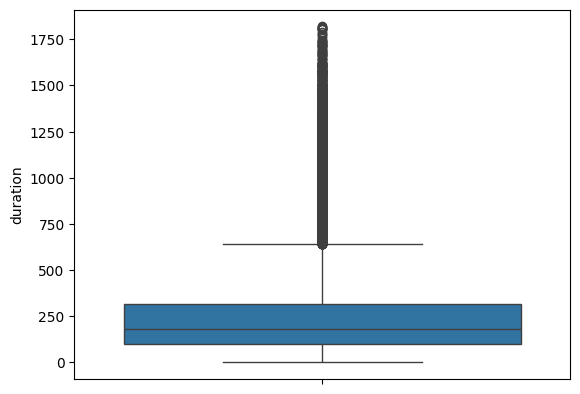

In [24]:
bank_additional_full_rm_outliers = remove_outliers_iqr(bank_additional_full, ['duration'])
sns.boxplot(bank_additional_full_rm_outliers['duration'])

In [25]:
bank_additional_full.shape[0] - bank_additional_full_rm_outliers.shape[0]

93

93 records were removed from the dataset

#### Class imbalance fixing

In [26]:
y_value_count = bank_additional_full_rm_outliers['y'].value_counts()
minority_class_len = y_value_count[1]
y_value_count, minority_class_len

/var/folders/lt/y3jky1md7pb_wvwzblnhhmyh0000gn/T/ipykernel_30559/433234353.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  minority_class_len = y_value_count[1]


(y
 no     36501
 yes     4582
 Name: count, dtype: int64,
 4582)

As we can see in the dataset there is a significant imbalance between yes and no classes. Deep Neural Networks tend to perform worse with the class imbalances therefore class imbalance need to be fixed. Due to nature of dataset undersampling is selected to fix the class imbalance.

In [27]:
minority = bank_additional_full_rm_outliers[bank_additional_full_rm_outliers['y'] == 'yes']
majority = bank_additional_full_rm_outliers[bank_additional_full_rm_outliers['y'] == 'no']
majority_undersampled = majority.sample(minority_class_len, random_state=42)
majority_minority_combined = pd.concat([minority, majority_undersampled])
majority_minority_combined

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,31,blue-collar,single,basic.9y,no,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
34662,30,admin.,single,high.school,no,yes,no,cellular,may,thu,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
30331,54,management,married,university.degree,no,no,no,telephone,apr,thu,...,1,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,no
18715,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


### Encoding

In [28]:
rf_data_copy = majority_minority_combined.copy()

In [29]:
rf_data_copy.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [30]:
rf_data_copy_encoded = rf_data_copy.copy()

In [31]:
label_encoders = {}
for column in rf_data_copy_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    rf_data_copy_encoded[column] = le.fit_transform(rf_data_copy_encoded[column])
    label_encoders[column] = le

In [32]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder(),
 'y': LabelEncoder()}

In [33]:
rf_data_copy_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,1,0,0,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
83,49,2,1,6,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
88,49,9,1,2,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
129,41,9,1,5,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
139,45,1,1,2,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,31,1,2,2,0,2,0,0,7,2,...,2,999,0,1,-0.1,93.200,-42.0,4.076,5195.8,0
34662,30,0,2,3,0,2,0,0,6,2,...,7,999,0,1,-1.8,92.893,-46.2,1.266,5099.1,0
30331,54,4,1,6,0,0,0,1,0,2,...,1,2,1,2,-1.8,93.075,-47.1,1.365,5099.1,0
18715,41,1,1,1,0,0,0,1,3,2,...,3,999,0,1,1.4,93.918,-42.7,4.968,5228.1,0


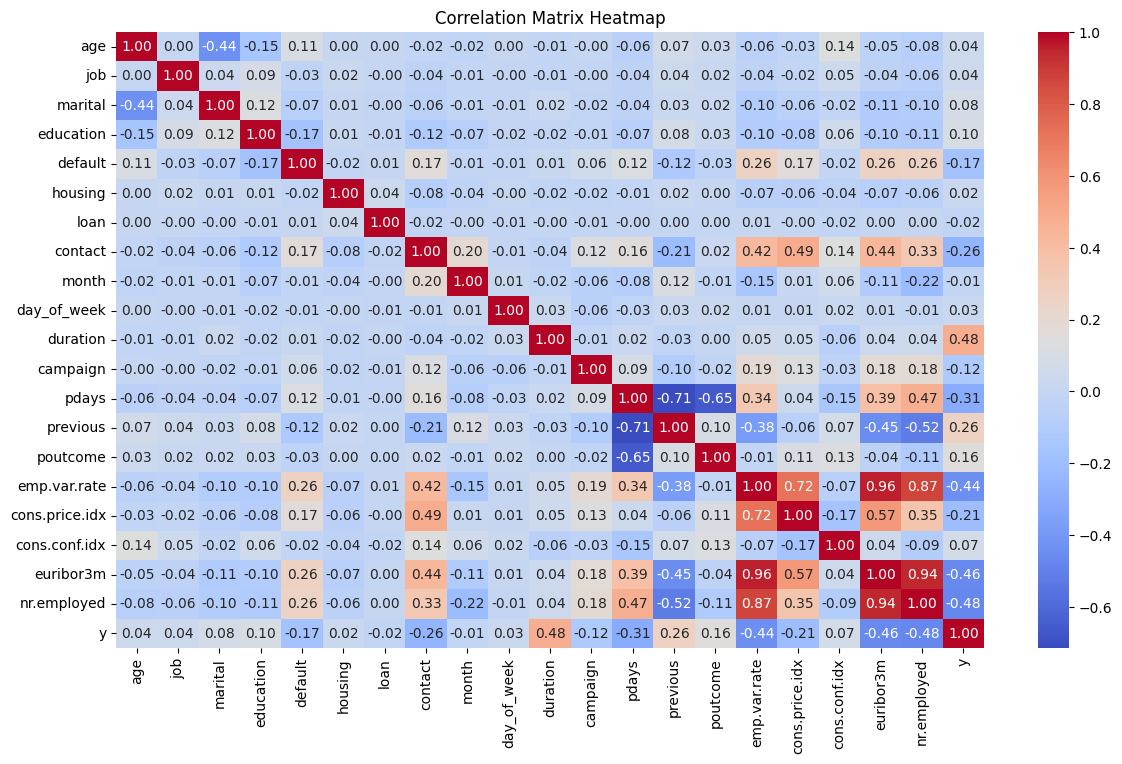

In [34]:
plt.figure(figsize=(14, 8))
sns.heatmap(rf_data_copy_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

There are 20 features in the dataset Dimentionality reduction can be performed to reduce the number of features. Principal Component Analysis will be used.

In [35]:
y = rf_data_copy_encoded['y']
rf_data_copy_encoded.drop(columns=['y'], inplace=True)
rf_data_copy_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
75,41,1,0,0,1,2,0,1,6,1,1575,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
83,49,2,1,6,1,2,0,1,6,1,1042,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
88,49,9,1,2,0,0,0,1,6,1,1467,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
129,41,9,1,5,1,2,0,1,6,1,579,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
139,45,1,1,2,1,2,0,1,6,1,461,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,31,1,2,2,0,2,0,0,7,2,135,2,999,0,1,-0.1,93.200,-42.0,4.076,5195.8
34662,30,0,2,3,0,2,0,0,6,2,284,7,999,0,1,-1.8,92.893,-46.2,1.266,5099.1
30331,54,4,1,6,0,0,0,1,0,2,107,1,2,1,2,-1.8,93.075,-47.1,1.365,5099.1
18715,41,1,1,1,0,0,0,1,3,2,5,3,999,0,1,1.4,93.918,-42.7,4.968,5228.1


In [36]:
scaler = StandardScaler()
rf_data_copy_encoded_scaled = scaler.fit_transform(rf_data_copy_encoded)
rf_data_copy_encoded_scaled = pd.DataFrame(rf_data_copy_encoded_scaled, columns=rf_data_copy_encoded.columns)
rf_data_copy_encoded_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.048556,-0.786330,-1.926870,-1.815991,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,3.715283,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
1,0.707761,-0.510495,-0.326849,0.988639,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,2.062227,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
2,0.707761,1.420355,-0.326849,-0.881114,-0.432667,-1.095651,-0.455722,1.597048,0.713208,-0.738020,3.380330,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
3,0.048556,1.420355,-0.326849,0.521201,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,0.626271,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
4,0.378158,-0.786330,-0.326849,-0.881114,2.311248,0.935820,-0.455722,1.597048,0.713208,-0.738020,0.260304,-0.579942,0.356430,-0.448124,0.021723,0.920404,0.809789,0.703133,0.997511,0.634509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,-0.775451,-0.786330,1.273173,-0.881114,-0.432667,0.935820,-0.455722,-0.626155,1.114795,-0.021957,-0.750759,-0.142131,0.356430,-0.448124,0.021723,0.225232,-0.442600,-0.342488,0.584736,0.689571
9160,-0.857852,-1.062166,1.273173,-0.413676,-0.432667,0.935820,-0.455722,-0.626155,0.713208,-0.021957,-0.288647,2.046925,0.356430,-0.448124,0.021723,-0.759595,-0.926836,-1.126704,-0.900407,-0.419690
9161,1.119764,0.041177,-0.326849,0.988639,-0.432667,-1.095651,-0.455722,1.597048,-1.696317,-0.021957,-0.837598,-0.579942,-2.818128,0.983250,2.162254,-0.759595,-0.639765,-1.294750,-0.848084,-0.419690
9162,0.048556,-0.786330,-0.326849,-1.348552,-0.432667,-1.095651,-0.455722,1.597048,-0.491555,-0.021957,-1.153943,0.295680,0.356430,-0.448124,0.021723,1.094197,0.689913,-0.473191,1.056177,1.060089


#### PCA

In [37]:
pca = PCA()
pca_data = pca.fit(rf_data_copy_encoded_scaled)

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21104725, 0.30440699, 0.38197742, 0.44462261, 0.50280269,
       0.55605059, 0.60744591, 0.6569236 , 0.70544186, 0.75258331,
       0.79833718, 0.84334441, 0.88412376, 0.92033695, 0.95096604,
       0.97658241, 0.99475338, 0.99862706, 0.99964888, 1.        ])

In [39]:
pca_17_components = PCA(n_components=17)
pca_17_component_data = pca_17_components.fit_transform(rf_data_copy_encoded_scaled)

In [40]:
pca_columns = [f"PC{i+1}" for i in range(pca_17_components.n_components)]
X_pca_df = pd.DataFrame(pca_17_component_data, columns=pca_columns)

In [41]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,2.632225,-1.251136,2.017014,0.595456,-1.954642,1.045846,-0.116663,0.641003,1.171569,2.803736,2.122976,0.538344,0.656874,-0.000411,-0.204924,-1.648438,0.188032
1,2.221253,-0.989282,0.601919,0.488127,-0.172594,0.412496,0.149679,0.536073,0.637501,1.970787,1.814448,-0.004914,2.094318,-0.944009,0.504158,0.015793,-0.210419
2,1.966382,-1.011604,0.439847,0.791927,-0.090043,1.515949,-0.924203,2.202917,2.219025,1.364905,1.362251,-0.024634,-0.999775,0.659976,0.349090,0.025138,-0.392578
3,2.168175,-0.966560,0.261971,0.683595,0.724064,-0.317186,0.764406,1.505175,-0.037847,2.081392,0.444923,-0.474732,1.242983,-0.811864,0.215087,-0.461035,-0.088886
4,2.354597,-1.092416,1.165377,1.115832,-0.417379,-0.301855,0.480375,-0.469676,-0.431754,1.944991,0.661031,-0.348407,1.032167,-0.181273,0.229674,-0.238093,0.022790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,0.448336,0.827000,-0.793898,0.840148,-0.534498,-0.208225,0.511112,-1.006389,-1.183731,0.472182,0.295076,-0.000444,-0.805437,0.159022,-1.219446,0.945137,-0.117951
9160,-0.982178,1.496838,-0.904954,0.495633,-0.997637,-1.205581,-0.582457,-0.946385,-1.045885,0.078767,0.162384,1.971808,-0.682301,-0.559044,-0.320230,0.484459,-0.111957
9161,-1.995917,-2.610496,-0.357357,-1.427709,0.209382,0.019929,-1.081521,-0.498119,-0.376804,-0.816917,-0.609990,-1.191266,-0.360735,-0.911795,1.857994,-0.519534,-2.356407
9162,2.491131,-0.618245,0.352126,0.647882,-0.125808,-0.132448,-0.794350,-0.937935,-0.628803,-0.873401,-0.591515,-0.492780,-1.060974,0.693048,0.506555,-0.314279,-0.641314


In [74]:
# Saving objects
joblib.dump(pca, 'pca.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Training

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

### Random Forest 

In [60]:
randomforest = RandomForestClassifier(n_jobs=-1, n_estimators=200)
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [61]:
rf_predictions = randomforest.predict(X_test)

In [68]:
print(confusion_matrix(y_pred=rf_predictions, y_true=y_test))
print(classification_report(y_pred=rf_predictions, y_true=y_test))

[[787 143]
 [111 792]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       930
           1       0.85      0.88      0.86       903

    accuracy                           0.86      1833
   macro avg       0.86      0.86      0.86      1833
weighted avg       0.86      0.86      0.86      1833



In [64]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [65]:
param_grid = {
    'n_estimators': range(200, 1000, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(1, 51, 2),
    'min_samples_split': range(2, 15, 2),
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, verbose=2, scoring=auc_scoring, cv=2, n_iter=100, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best parameters found: ", rf_search.best_params_)
print("Best precision found: ", rf_search.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   2.5s
[CV] END criterion=gini, max_depth=37, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=37, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   2.6s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=600; total time=   5.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=600; total time=   5.3s
[CV] END criterion=gini, max_depth=37, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200

In [66]:
optimized_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=6,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=29,
    criterion='entropy',
    n_jobs=-1
)

optimized_rf_model.fit(X_train, y_train)

optimized_rf_predictions = optimized_rf_model.predict(X_test)

print(confusion_matrix(y_pred=optimized_rf_predictions, y_true=y_test))
print(classification_report(y_pred=optimized_rf_predictions, y_true=y_test))

[[792 138]
 [106 797]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       930
           1       0.85      0.88      0.87       903

    accuracy                           0.87      1833
   macro avg       0.87      0.87      0.87      1833
weighted avg       0.87      0.87      0.87      1833



In [74]:
joblib.dump(optimized_rf_model, 'optimized_rf_model.pkl')

['optimized_rf_model.pkl']

### Tensorflow

#### Tensor Conversion

In [43]:
X_train_bal = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val_bal = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_bal = tf.convert_to_tensor(y_train.values, dtype=tf.int32)
y_val_bal = tf.convert_to_tensor(y_test.values, dtype=tf.int32)

2024-12-26 10:22:11.759233: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-26 10:22:11.759304: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-26 10:22:11.759320: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-26 10:22:11.759638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-26 10:22:11.760070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [44]:
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_bal, y_train_bal)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_bal, y_val_bal)).batch(BATCH_SIZE)

#### Model Building

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=17, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='bank_marketing_model')

model.summary()

Model: "bank_marketing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3505 (13.69 KB)
Trainable params

In [46]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

callbacks = [early_stopping, tensorboard_callback, model_checkpoint]

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model Training

In [48]:
model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=callbacks)

Epoch 1/100


2024-12-26 10:23:11.268752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


230/230 [==============================] - 4s 12ms/step - loss: 0.4990 - accuracy: 0.7752 - val_loss: 0.3704 - val_accuracy: 0.8494
Epoch 2/100
230/230 [==============================] - 2s 7ms/step - loss: 0.3996 - accuracy: 0.8345 - val_loss: 0.3677 - val_accuracy: 0.8522
Epoch 3/100
230/230 [==============================] - 2s 8ms/step - loss: 0.3836 - accuracy: 0.8427 - val_loss: 0.3639 - val_accuracy: 0.8527
Epoch 4/100
230/230 [==============================] - 2s 8ms/step - loss: 0.3807 - accuracy: 0.8449 - val_loss: 0.3631 - val_accuracy: 0.8571
Epoch 5/100
230/230 [==============================] - 1s 6ms/step - loss: 0.3901 - accuracy: 0.8396 - val_loss: 0.3679 - val_accuracy: 0.8494
Epoch 6/100
230/230 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8315 - val_loss: 0.3715 - val_accuracy: 0.8532
Epoch 7/100
230/230 [==============================] - 2s 7ms/step - loss: 0.4453 - accuracy: 0.8251 - val_loss: 0.5104 - val_accuracy: 0.7730
Epoch 8/10

In [52]:
model.evaluate(val_dataset)

58/58 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8571


[0.36314383149147034, 0.8570649027824402]

In [53]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train_bal.shape[1],)
    ))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(tf.keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [55]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='kt_dir',
    project_name='bank_marketing_tuning'
)

tuner.search(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param in best_hps.values.keys():
    print(f"{param}: {best_hps.get(param)}")

# Build the model with the optimal hyperparameters and train it
rs_dl_model = tuner.hypermodel.build(best_hps)
rs_dl_history = rs_dl_model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Trial 20 Complete [00h 01m 11s]
val_accuracy: 0.8554282486438751

Best val_accuracy So Far: 0.8554282486438751
Total elapsed time: 00h 43m 33s
Best hyperparameters:
units: 160
dropout: 0.4
num_layers: 1
units_0: 32
dropout_0: 0.4
optimizer: rmsprop
units_1: 64
dropout_1: 0.0
units_2: 64
dropout_2: 0.4
Epoch 1/50
230/230 [==============================] - 3s 8ms/step - loss: 0.4239 - accuracy: 0.8105 - val_loss: 0.3746 - val_accuracy: 0.8538
Epoch 2/50
230/230 [==============================] - 1s 6ms/step - loss: 0.3705 - accuracy: 0.8509 - val_loss: 0.3783 - val_accuracy: 0.8500
Epoch 3/50
230/230 [==============================] - 1s 6ms/step - loss: 0.3609 - accuracy: 0.8584 - val_loss: 0.3795 - val_accuracy: 0.8522
Epoch 4/50
230/230 [==============================] - 1s 6ms/step - loss: 0.3563 - accuracy: 0.8588 - val_loss: 0.3802 - val_accuracy: 0.8500
Epoch 5/50
230/230 [==============================] - 1s 6ms/step - loss: 0.3541 - accuracy: 0.8606 - val_loss: 0.3795 - val_accu

In [57]:
dl_predictions = rs_dl_model.predict(val_dataset)
dl_predictions = tf.round(dl_predictions).numpy().astype(int).flatten()

58/58 [==============================] - 0s 2ms/step


In [69]:
rs_dl_model.save('rs_dl_model.keras')

## Evaluations

A Detailed evaluation with comparison of the `Random Forest` and the `Deep learning model` 

In [67]:
rf_classification_report = classification_report(y_test, optimized_rf_predictions, target_names=['no', 'yes'])
print("Random Forest Model Classification Report:\n", rf_classification_report)

dl_classification_report = classification_report(y_test, dl_predictions, target_names=['no', 'yes'])
print("Deep Learning Model Classification Report:\n", dl_classification_report)

Random Forest Model Classification Report:
               precision    recall  f1-score   support

          no       0.88      0.85      0.87       930
         yes       0.85      0.88      0.87       903

    accuracy                           0.87      1833
   macro avg       0.87      0.87      0.87      1833
weighted avg       0.87      0.87      0.87      1833

Deep Learning Model Classification Report:
               precision    recall  f1-score   support

          no       0.85      0.86      0.86       930
         yes       0.86      0.84      0.85       903

    accuracy                           0.85      1833
   macro avg       0.85      0.85      0.85      1833
weighted avg       0.85      0.85      0.85      1833



## Data Pipeline and Experimentation

In [75]:
saved_pca = joblib.load('pca.pkl')
saved_label_encoders = joblib.load('label_encoders.pkl')
saved_scaler = joblib.load('scaler.pkl')
saved_model = tf.keras.models.load_model('rs_dl_model.keras')
saved_rf_model = joblib.load('optimized_rf_model.pkl')

/opt/anaconda3/envs/dlenv/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/envs/dlenv/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/envs/dlenv/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.0 when using version 1.6.0. This

In [79]:
def preprocess_data_rf(data, label_encoders, scaler, pca):
    data_copy = data.copy()
    for column in data_copy.select_dtypes(include='object').columns:
        le = label_encoders.get(column)
        data_copy[column] = le.transform(data_copy[column])
    data_scaled = scaler.transform(data_copy)
    data_pca = pca.transform(data_scaled)
    return pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

def preprocess_data_dl(data, label_encoders, scaler, pca):
    rf_data = preprocess_data_rf(data, label_encoders, scaler, pca)
    return tf.convert_to_tensor(rf_data, dtype=tf.float32)

def random_forest_prediction(data, label_encoders, scaler, model, pca):
    preprocessed_data = preprocess_data_rf(data, label_encoders, scaler, pca)
    predictions = model.predict(preprocessed_data)
    return predictions

def deep_learning_prediction(data, label_encoders, scaler, model, pca):
    preprocessed_data = preprocess_data_dl(data, label_encoders, scaler, pca)
    predictions = model.predict(preprocessed_data)
    predictions = tf.round(predictions).numpy().astype(int).flatten()
    return predictions

In [73]:
def get_user_input():
    user_data = {}
    user_data['age'] = int(input("Enter age: "))
    user_data['job'] = input("Enter job: ")
    user_data['marital'] = input("Enter marital status: ")
    user_data['education'] = input("Enter education: ")
    user_data['default'] = input("Enter default status: ")
    user_data['housing'] = input("Enter housing status: ")
    user_data['loan'] = input("Enter loan status: ")
    user_data['contact'] = input("Enter contact type: ")
    user_data['month'] = input("Enter month: ")
    user_data['day_of_week'] = input("Enter day of the week: ")
    user_data['duration'] = int(input("Enter duration: "))
    user_data['campaign'] = int(input("Enter campaign: "))
    user_data['pdays'] = int(input("Enter pdays: "))
    user_data['previous'] = int(input("Enter previous: "))
    user_data['poutcome'] = input("Enter poutcome: ")
    user_data['emp.var.rate'] = float(input("Enter emp.var.rate: "))
    user_data['cons.price.idx'] = float(input("Enter cons.price.idx: "))
    user_data['cons.conf.idx'] = float(input("Enter cons.conf.idx: "))
    user_data['euribor3m'] = float(input("Enter euribor3m: "))
    user_data['nr.employed'] = float(input("Enter nr.employed: "))
    
    return pd.DataFrame([user_data])